In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('ToyotaCorolla - MLR.csv')

### EDA

In [3]:
data.head(5)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
data.shape

(1436, 11)

In [6]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
Automatic,1436.0,0.055710,0.229441,0.0,0.0,0.0,0.00,1.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Cylinders,1436.0,4.000000,0.000000,4.0,4.0,4.0,4.00,4.0
Gears,1436.0,5.026462,0.188510,3.0,5.0,5.0,5.00,6.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [8]:
# univariance 
data.nunique()

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [9]:
data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [10]:
# remove duplicates
data=data.drop_duplicates().reset_index(drop=True)
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


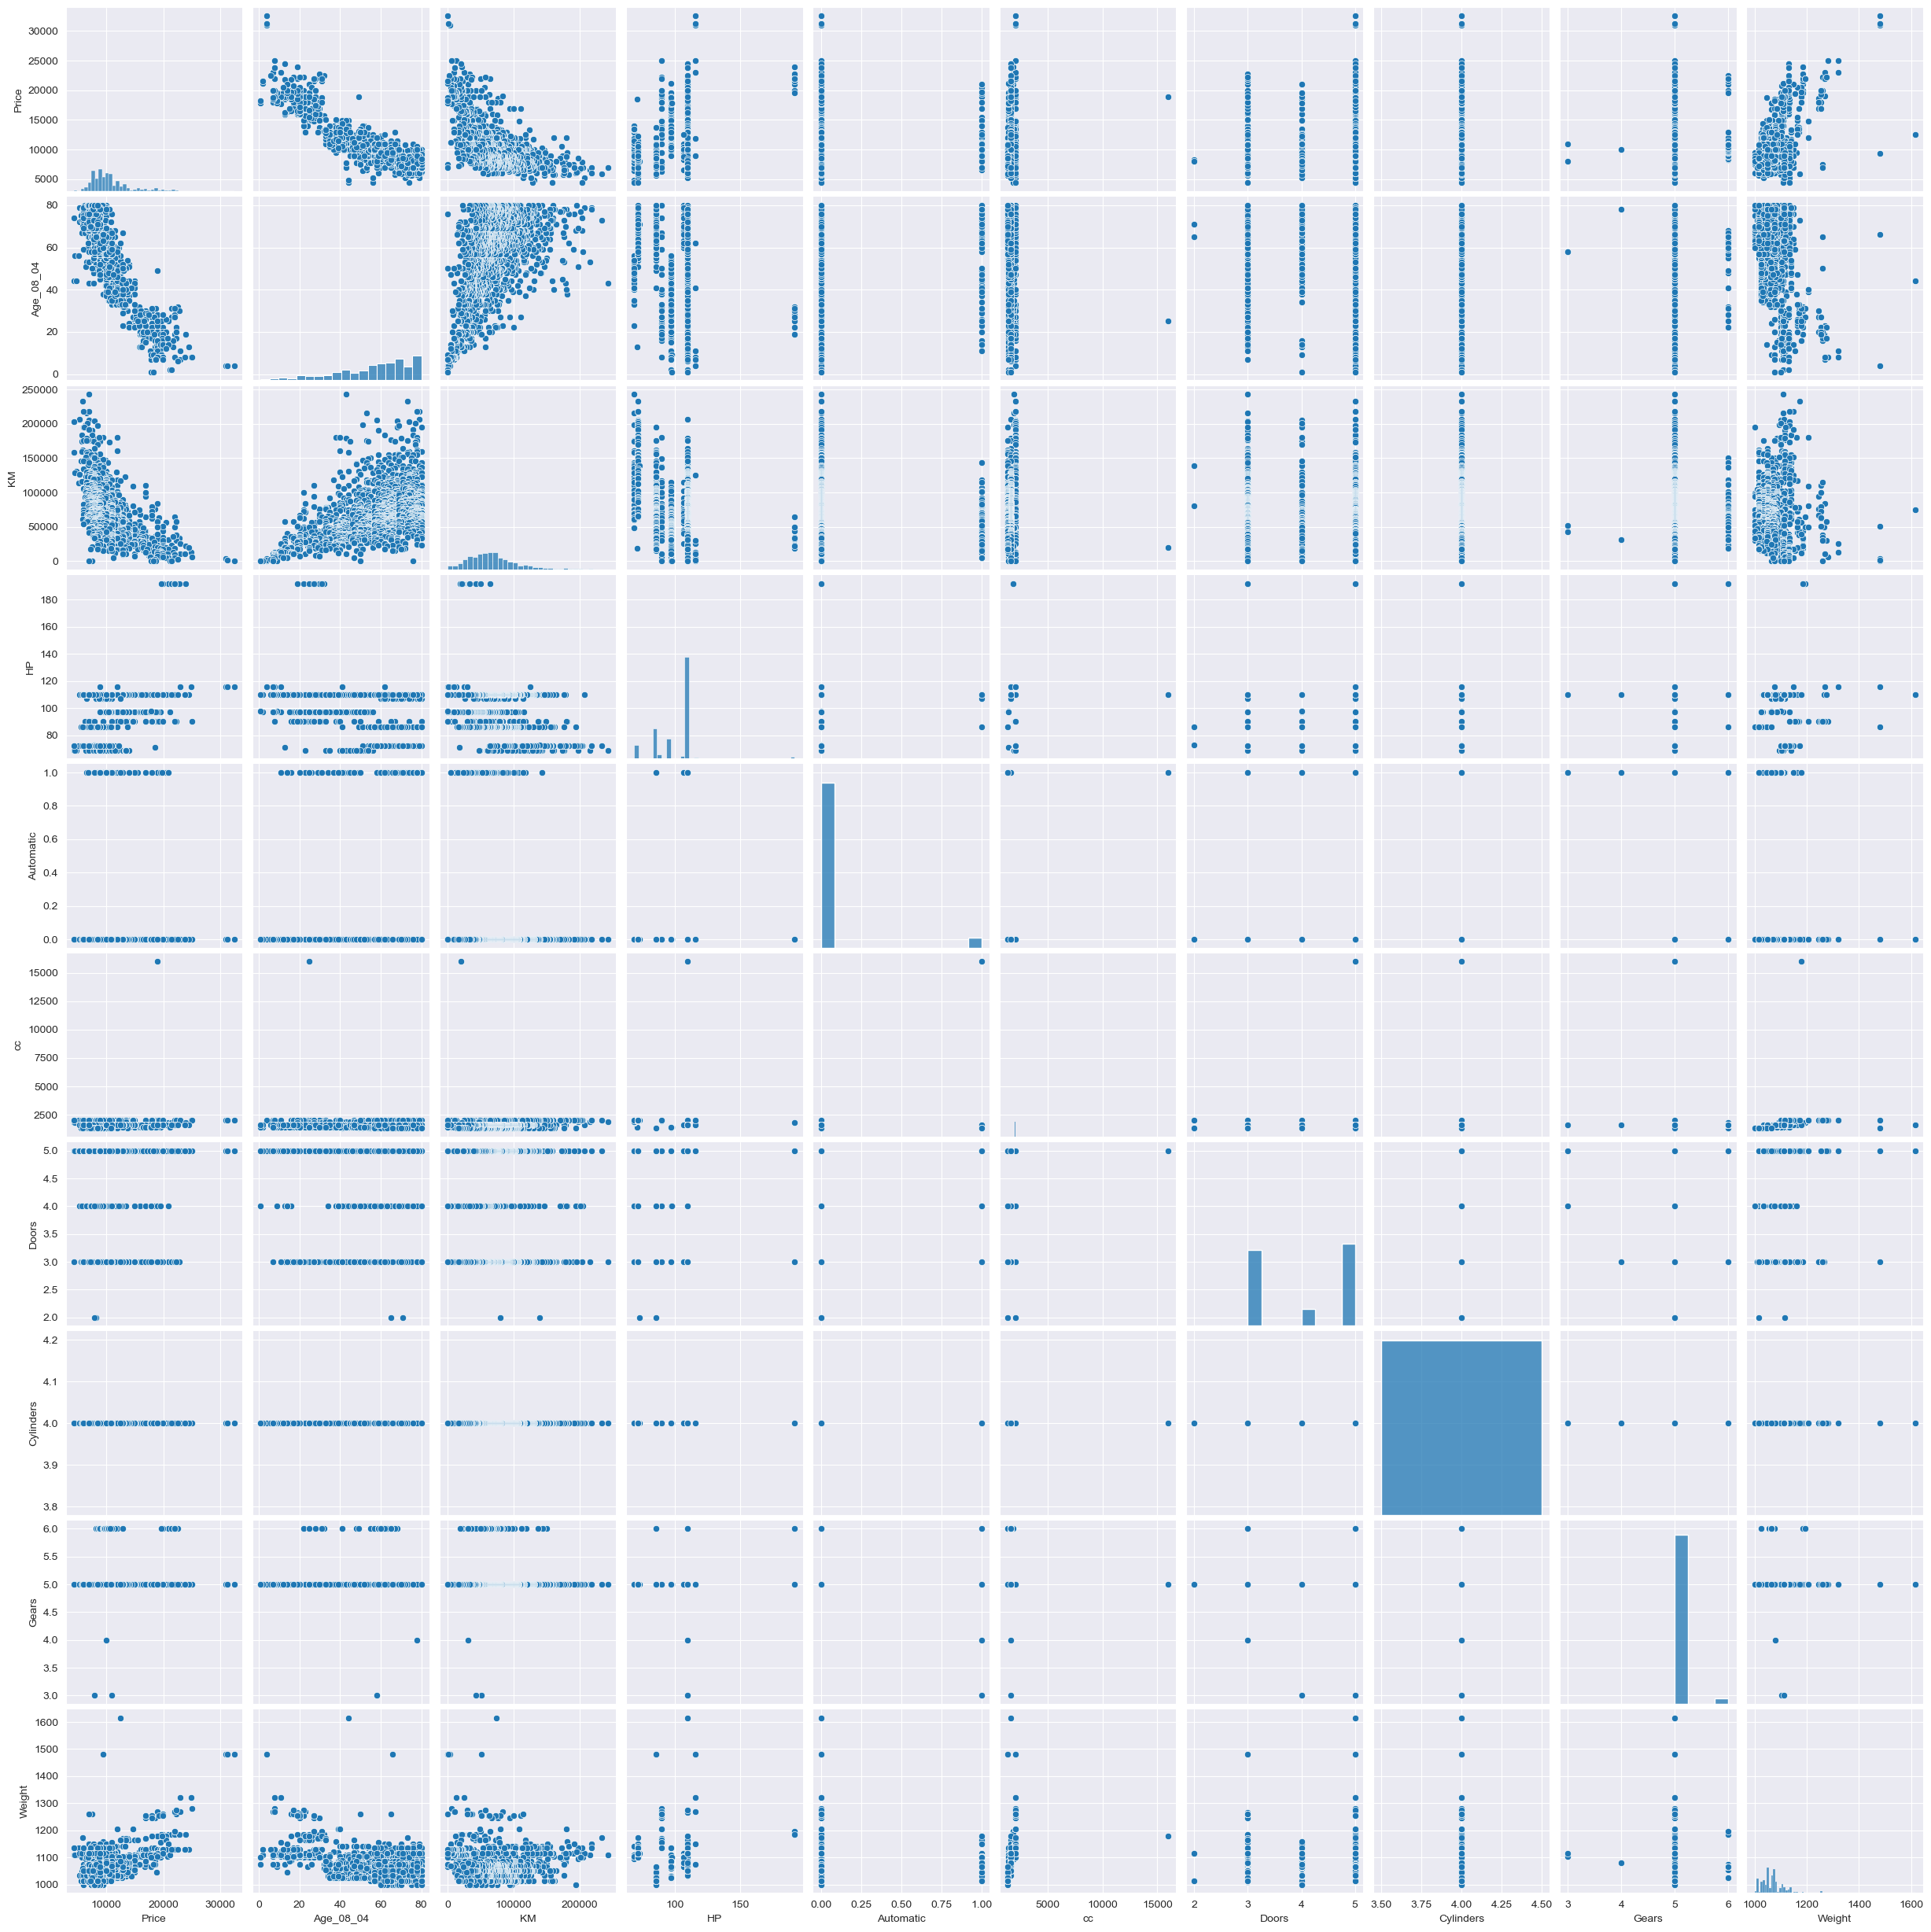

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [12]:
numerical_data=data.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_data=data.select_dtypes(include='object').columns.tolist()

print(f"numerical columns :{numerical_data}")
print(f"numerical columns :{categorical_data}")

numerical columns :['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
numerical columns :['Fuel_Type']


In [13]:
data=pd.get_dummies(data,columns=['Fuel_Type'],drop_first=True)

In [14]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1431,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1432,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1433,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [15]:
#feature enginerring
x=data.drop(['Price'],axis=1)
y=data['Price']

In [16]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,1,0
1,23,72937,90,0,2000,3,4,5,1165,1,0
2,24,41711,90,0,2000,3,4,5,1165,1,0
3,26,48000,90,0,2000,3,4,5,1165,1,0
4,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1430,69,20544,86,0,1300,3,4,5,1025,0,1
1431,72,19000,86,0,1300,3,4,5,1015,0,1
1432,71,17016,86,0,1300,3,4,5,1015,0,1
1433,70,16916,86,0,1300,3,4,5,1015,0,1


In [17]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1430     7500
1431    10845
1432     8500
1433     7250
1434     6950
Name: Price, Length: 1435, dtype: int64

In [18]:
# model selection
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)


In [19]:
#model building 
import statsmodels.formula.api as smf
import statsmodels as sm
from statsmodels.graphics.regressionplots import influence_plot

# model1 basic  linear regrssion with all feature 

In [20]:
model1=LinearRegression()

In [21]:
model1.fit(x_train,y_train)

LinearRegression()

In [22]:
x_pred=model1.predict(x_test)

In [23]:
x_pred

array([10807.90535562, 10326.70702975,  9168.77441877,  9347.15626531,
        8470.34132486,  8543.65542432,  7890.51491251,  8267.18515775,
       11740.09825166, 12334.33673915,  9538.84715345,  9343.2772499 ,
       13151.62230944, 12183.7311916 ,  8955.44305956, 11562.79744357,
       12318.27958279, 17494.77460433, 10506.36308759, 11420.82637518,
       11404.90266848, 18170.58387433,  9797.58175568, 10367.79446677,
        7498.84353655, 16057.15004301,  7163.87566159,  8195.01434538,
       15740.93733632, 13847.45079836,  8183.96037632, 10259.797919  ,
       10095.67070523, 10120.83834384,  9988.84509234,  8662.19170708,
        8752.08813896,  9987.8352507 , 16449.21188843, 10645.96635186,
        8859.10137441,  9521.32840873, 10195.96004526,  8537.43897408,
       10563.41684558, 17692.3646716 , 10432.31676192,  9194.2877468 ,
       10590.51850606, 12331.30302036, 12849.29733689,  6345.49405977,
       15052.47843557, 16427.64844543,  6162.48744755,  7557.49951177,
      

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
score=r2_score(y_test,x_pred)
print("the r2_SCORE IS ",score)

the r2_SCORE IS  0.820321386996181


In [25]:
x_test.shape

(287, 11)

In [26]:
y_test.shape

(287,)

In [35]:
print("Coefficients:",model1.coef_)
print("Intercept:", model1.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, x_pred))
print("R-squared:", r2_score(y_test, x_pred))

Coefficients: [-1.21229191e+02 -1.59971491e-02  1.60754378e+01  2.68822211e+02
 -4.71094877e-02 -8.80971638e+01 -1.70530257e-12  4.55011874e+02
  2.63612017e+01 -3.89683843e+02  1.12893306e+03]
Intercept: -14115.23722594573
Mean Squared Error: 2155628.356139621
R-squared: 0.820321386996181


# model2 MLR with the selected  feature based on correlation analysis


In [37]:
correlation_matrix=data.corr()

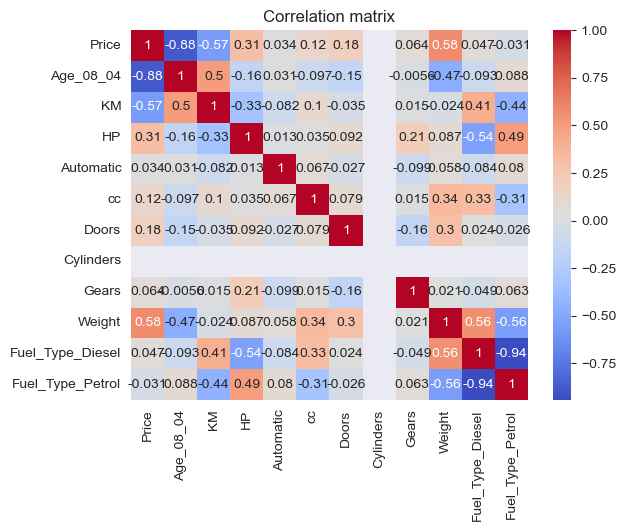

In [38]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

In [67]:
duplicate=data.duplicated().sum()
duplicate

0

In [39]:
# droping the high correlational columns with each other and droping one of them who are  less correlation  to the price(targeted values) 
x_corr=data.drop(columns=['Fuel_Type_Diesel','cc','HP','Automatic'])
y_cor=data['Price']

In [47]:
# model building
c_train,c_test,i_train,i_test=train_test_split(x_corr,y_cor,train_size=0.8,random_state=42)

In [48]:
model2=LinearRegression()

In [49]:
model2.fit(c_train,i_train)

LinearRegression()

In [60]:
corr_predict=model2.predict(c_test)

In [61]:
score=r2_score(i_test,corr_predict)

In [62]:
score

1.0

In [63]:
model2.fit(c_test,i_test)
corr_test_predict=model2.predict(c_test)
test_score=r2_score(i_test,corr_test_predict)
print(f"r2_score  is {test_score}")

r2_score  is 1.0


In [66]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(model2,x_corr, y_cor, cv=10, scoring='r2')
print("Cross-Validation R² Scores:", cv_r2)
print("Average Cross-Validation R²:", np.mean(cv_r2))

Cross-Validation R² Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Cross-Validation R²: 1.0


# regulalized models(ridge and lasso )

In [69]:
# regulizaed model 
from sklearn.linear_model import Ridge,Lasso

ridge_model3=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
ridge_r2=ridge_model.score(x_test,y_test)
print("R2 with ridge regression:",ridge_r2)


R2 with ridge regression: 1.0


In [72]:
lasso_model4=Lasso(0.1)
lasso_model.fit(x_train,y_train)
lasso_r2=lasso_model.score(x_test,y_test)
print("R2 with lasoo regression",lasso_r2)

R2 with lasoo regression 0.9999999999999999
